In [13]:
# panda v1.5 above (p.2-28)
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
pd.get_dummies(df, columns=["color"], prefix='is', prefix_sep='_')

,size,price,classlabel,is_blue,is_green,is_red
0,M,10.1,class1,False,True,False
1,L,13.5,class2,False,False,True
2,XL,15.3,class1,True,False,False


In [14]:
df2 = pd.get_dummies(df, columns=["color"], prefix='is', prefix_sep='_')
pd.from_dummies(df2[['is_blue', 'is_green', 'is_red']], sep='_')

,is
0,green
1,red
2,blue


In [15]:
#-- §2-6 p.2-29 --#
from sklearn.preprocessing import OneHotEncoder

X = [['Male', 1], ['Female', 3], ['Female', 2]]
encoder = OneHotEncoder(handle_unknown='ignore')
X_new = encoder.fit_transform(X)
X_new.toarray()

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [16]:
# 顯示類別
encoder.categories_


[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [17]:
# inverse_transform 可還原為原值
X_org = encoder.inverse_transform(X_new)
X_org

array([['Male', 1],
       ['Female', 3],
       ['Female', 2]], dtype=object)

In [18]:
# One-hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')
color_new = encoder.fit_transform(df[['color']])

# get_feature_names_out 產生新的欄位名稱；feature_names_in_ 可取得原欄位名稱
column_names = encoder.get_feature_names_out(encoder.feature_names_in_)

df_new = pd.DataFrame(color_new.toarray(), columns=column_names)
df_new


,color_blue,color_green,color_red
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0


In [ ]:
"""
【sklearn中fit、fit_transform、transform的區別】
https://www.cupoy.com/post/0000017EA058A745000000016375706F795F72656C656173654B5741535354434C55424E455753

fit：原義指的是安裝、使適合的意思，其實有點train的含義但是和train不同的是，它並不是一個訓練的過程，而是一個適配的過程，過程都是定死的，最後只是得到了一個統一的轉換的規則模型。
transform：是將資料進行轉換，比如資料的歸一化和標準化，將測試資料按照訓練資料同樣的模型進行轉換，得到特徵向量。
fit_transform：可以看做是fit和transform的結合，如果訓練階段使用fit_transform，則在測試階段只需要對測試樣本進行transform就行了。

【scikit-learn 數據預處理-fit_transform()與transform()之差異】
https://medium.com/@maggieliao.cm04g/scikit-learn-%E6%95%B8%E6%93%9A%E9%A0%90%E8%99%95%E7%90%86-fit-transform-%E8%88%87transform-%E4%B9%8B%E5%B7%AE%E7%95%B0-3c7cc07c124f

fit_transform():
fit_transform(partData)是先對partData作fit()的功能，找到該partData的整體統計特性之指標，如平均值、標準差、最大最小值等等(能依據不同目的套用這些指標在不同的轉換(即後面的transform()動作)上，再實行transform(partData)以對partData進行標準化(英文稱為normalization, 主要有兩種方法: min-max normalization or standard deviation normalization)或歸一化等動作.
根據之前fit(partData)所找出來，對於剩餘數據（restData）使用相同的平均值、標準差、最大/最小值等指標進行轉換 transform(restData)，從而保證partData、restData是以同樣的統計指標下去作標準化等轉換之資料前處理。
"""

In [19]:
# 刪除原欄位 'color'
df.drop(['color'], axis=1, inplace=True)

# 合併表格
df2 = pd.concat([df, df_new], axis=1)
df2

,size,price,classlabel,color_blue,color_green,color_red
0,M,10.1,class1,0.0,1.0,0.0
1,L,13.5,class2,0.0,0.0,1.0
2,XL,15.3,class1,1.0,0.0,0.0


In [20]:
# 存檔
import joblib

joblib.dump(encoder, 'joblib')

['joblib']

In [12]:
#-- p.2-32 --#
"""
pip install yfinance --upgrade --no-cache-dir
"""
import pandas as pd
import yfinance as yf

df_quote = yf.download('1101.TW', start='2020-01-01', end='2024-11-19')
df_quote.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-11-12,32.700001,32.750000,32.200001,32.450001,32.450001,23022123
2024-11-13,32.250000,32.750000,32.200001,32.450001,32.450001,18150100
2024-11-14,32.450001,32.650002,32.299999,32.349998,32.349998,16571895
2024-11-15,32.599998,33.349998,32.549999,33.150002,33.150002,29588758
2024-11-18,33.250000,33.700001,33.150002,33.250000,33.250000,19238941


In [23]:
#-- CH04 --#
import numpy as np
data = np.array([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])
data


array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [3]:
# 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(data) # 輸出結果：全部介於 0 ~ 1 之間

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load data
X, y = datasets.load_breast_cancer(return_X_y=True)

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [7]:
# Foluma : X_new = ( X - min ) / ( max - min )
# values between 0 and 1
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

#clf.fit(X_train, y_train)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test)

print(f'{accuracy_score(y_test, y_pred)*100:.2f}%')

32.46%


In [4]:
# p.4-4 §4-1-2 標準化 (Standardization)
# X_new = ( X - u ) / v
# u : 平均數 ; v : 標準差

import numpy as np
data = np.array([[0,0], [0,0], [1, 1], [1, 1]])
data

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1]])

In [6]:
# param with_mean=False : 平均數不歸 0
# param with_std=False : 標準差不為 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [8]:
# use numpy verification 
mean1 = np.mean(data, axis=0)
std1 = np.std(data, axis=0)
mean1, std1

(array([0.5, 0.5]), array([0.5, 0.5]))

In [10]:
# §4-1-3 MaxAbsScaler
# 限制變數絕對值最大為 1，其他依比例轉換，只是縮小規模，不改中心點

import numpy as np 
data = np.array([[1., -1., 2.], [2., 0., 0.], [0., 1., -1.]])
data

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [11]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit_transform(data)


array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [12]:
# use numpy verification 
max1 = np.max(data, axis=0)
data / max1

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [13]:
# §4-1-4 RobustScaler
# 類似標準化，但以中位數取代平均數，以IRQ取代標準差，希望降低離群值的影響，
# 作是將中位數歸 0，再除以 IRQ
import numpy as np
data = np.array([[1., -2., 2.], [-2., 1., 3.], [4., 1., -2.]])
data

array([[ 1., -2.,  2.],
       [-2.,  1.,  3.],
       [ 4.,  1., -2.]])

In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(data)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

data=
 [[ 1. -2.  2.]
 [-2.  1.  3.]
 [ 4.  1. -2.]]


,label,最小值,箱子下緣,中位數,箱子上緣,最大值
0,0,-2.0,-0.5,1.0,2.5,4.0
1,1,-2.0,-0.5,1.0,1.0,1.0
2,2,-2.0,0.0,2.0,2.5,3.0


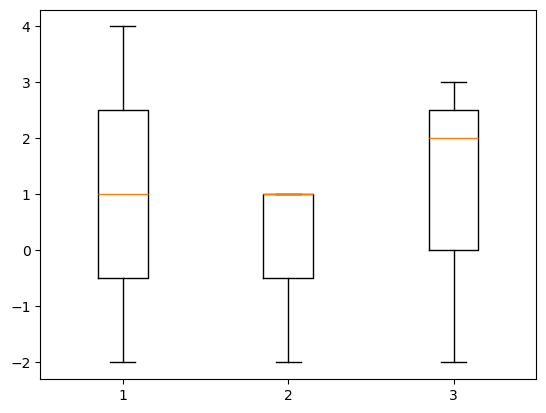

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

def get_box_plot_data(data, bp) :
    rows_list = []

    for i in range(data.shape[1]) :
        dict1 = {}
        dict1['label'] = i
        dict1['最小值'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['箱子下緣'] = bp['boxes'][i].get_ydata()[1]
        dict1['中位數'] = bp['medians'][i].get_ydata()[1]
        dict1['箱子上緣'] = bp['boxes'][i].get_ydata()[2]
        dict1['最大值'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)
    return pd.DataFrame(rows_list)

print('data=\n', data)
bp = plt.boxplot(data)
#print('bp=\n', bp)
get_box_plot_data(data, bp)
    

In [23]:
# 04_05_SelectKBest.ipynb
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y = datasets.load_iris(return_X_y=True)
X.shape

(150, 4)

In [24]:
clf = SelectKBest(chi2, k=2)
X_new = clf.fit_transform(X, y)
X_new.shape

(150, 2)

In [26]:
# 顯示特徵分數
print('顯示特徵分數= ', clf.scores_)
# 顯示 p value
print('顯示p value= ', clf.pvalues_)

顯示特徵分數=  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
顯示p value=  [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


In [27]:
# 顯示特徵名稱
import numpy as np
ds = datasets.load_iris()
np.array(ds.feature_names)[clf.scores_.argsort()[-2:][::-1]]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [28]:
# 另一種寫法
import pandas as pd
X = pd.DataFrame(ds.data, columns=ds.feature_names)
clf = SelectKBest(chi2, k=2)
X_new = clf.fit_transform(X, y)
clf.get_feature_names_out()

array(['petal length (cm)', 'petal width (cm)'], dtype=object)

In [ ]:
# 04_05_SelectKBest.ipynb
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, chi2


In [20]:
#X, y = datasets.load_iris(return_X_y=True)
X, y = datasets.load_iris(return_X_y=True, as_frame=False)
X.shape

(150, 4)

In [21]:
print('X= ', X)
print('y= ', y)

X=  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.

In [24]:
clf = SelectKBest(chi2, k=2)
X_new = clf.fit_transform(X, y)
X_new.shape

(150, 2)

In [25]:
print('X_new= ', X_new)

X_new=  [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [

In [27]:
print('score= ', clf.scores_)
print('pvalue= ', clf.pvalues_)

score=  [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
pvalue=  [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]


In [28]:
# 顯示特徵名稱 method 1
import numpy as np
ds = datasets.load_iris()
np.array(ds.feature_names)[clf.scores_.argsort()[-2:][::-1]]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [42]:
# 顯示特徵名稱 method 2
import pandas as pd
X = pd.DataFrame(ds.data, columns=ds.feature_names)
#print('X= ', X)

clf = SelectKBest(chi2, k=2)
print('clf= ', clf)
X_new = clf.fit_transform(X, y)
#print('X_new= ', X_new)
print(clf.get_feature_names_out())

clf=  SelectKBest(k=2, score_func=<function chi2 at 0x0000029AFE7B1940>)
['petal length (cm)' 'petal width (cm)']


In [43]:
X = X[clf.get_feature_names_out()].values


In [44]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,